In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [20]:
import numpy as np

class Perceptron2(object):
    
    def __init__(self, eta=0.01, epochs=10, random_state=1):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y):

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0.0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[1:] -=  update * xi
                self.w_[0] -=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [30]:
iris = datasets.load_iris()
X = iris.data[50:150, 0:2]
y = iris.target[50:150]

In [31]:
yy = []

for x in y:
    if x == 1:
        x = -1
    else:
        x = 1
    yy.append(x)

y = yy

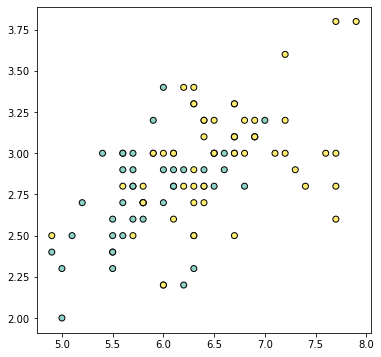

In [32]:
plt.figure(2, figsize=(6, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set3, edgecolor='k')

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [35]:
from sklearn.linear_model import Perceptron
ppn = Perceptron2(epochs=50, eta=0.01, random_state=0)
ppn.fit(X_train_std, y_train)

In [36]:
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_test_std)
print(y_pred)
print('Miscladified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' %accuracy_score(y_test, y_pred))

[ 1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1  1]
Miscladified samples: 12
Accuracy: 0.40


In [37]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

<AxesSubplot:>

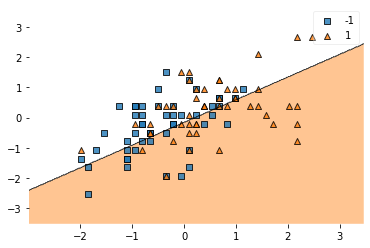

In [38]:
from mlxtend.plotting import plot_decision_regions
#plot_decision_regions(X=X_combined_std, y=y_combined, feature_index=[0,1], clf=ppn)
plot_decision_regions(X=X_combined_std, y=y_combined, feature_index=[0,1], clf=ppn)